In [122]:
# Importar todos os pacotes para rodar este porgrama
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

In [123]:
# Dicionário que iremos usar para o algoritmo de Machine Learning
dict_vendas = {
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}

In [124]:
# Transformar o dicionário em um DataFrame
df_vendas = pd.DataFrame.from_dict(dict_vendas)

In [125]:
# Adicionar uma coluna para representar os meses numericamente
df_vendas['mes_numero'] = range(1, 13)

In [126]:
# Atribuir as variáveis X e y para serem treinadas posteriormente
X = df_vendas[['mes_numero']]
y = df_vendas['vendas']

In [127]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [128]:
# Treinar modelo com Regressão Linear
model = LinearRegression().fit(X_train, y_train)

In [129]:
# Fazer previsões
y_pred = model.predict(X_test)

In [130]:
# Avaliar o modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printar os resultados
print("Mean Absolute Error (MAE): ", mae)
print("Mean Squared Error (MSE): ", mse)
print("R2 Score: ", r2)

Mean Absolute Error (MAE):  54.84171322160122
Mean Squared Error (MSE):  5765.308510970324
R2 Score:  0.9804933170681456


In [131]:
# Calcular os coeficientes do modelo
model_coef = model.coef_
model_intercept = model.intercept_

# Exibir os coeficiêntes do modelo
print("Coeficiênte: ", model_coef)
print("Intercepto: ", model_intercept)

Coeficiênte:  [109.3575419]
Intercepto:  2019.5530726256984


In [132]:
# Prever as vendas para qualquer mês
# Criar um DataFrame com a mesma estrutura que o modelo espera
NUM_MES = 3

df_previsao_mes = pd.DataFrame({'mes_numero': [NUM_MES]})

# Fazer a previsão para o mês
previsao_mes = model.predict(df_previsao_mes)

# Exibir a previsão
print(f"Previsão de vendas: {round(previsao_mes[0], 2)}")

Previsão de vendas: 2347.63


In [133]:
# Prever as vendas para o mês de Dezembro (mes_numero == 12)
# Criar um DataFrame com a mesma estrutura que o modelo espera
df_mes_dezembro = pd.DataFrame({'mes_numero': [12]})

# Fazer a previsão para o mês de dezembro
previsao_dezembro = model.predict(df_mes_dezembro)

# Exibir a previsão
print(f"Previsão de vendas para Dezembro: {round(previsao_dezembro[0], 2)}")

Previsão de vendas para Dezembro: 3331.84


In [134]:
# Prever as vendas para todos os meses
# Loop para percorrer os meses de 1 a 12 e prever as vendas para cada mês
for mes in range(1, 13):
    # Criar um DataFrame com o valor do mês atual
    df_previsao_mes = pd.DataFrame({'mes_numero': [mes]})

    # Fazer a previsão para o mês
    previsao_mes = model.predict(df_previsao_mes)

    # Exibir a previsão
    print(f"Previsão de vendas para o mês {mes}: {round(previsao_mes[0], 2)}")


Previsão de vendas para o mês 1: 2128.91
Previsão de vendas para o mês 2: 2238.27
Previsão de vendas para o mês 3: 2347.63
Previsão de vendas para o mês 4: 2456.98
Previsão de vendas para o mês 5: 2566.34
Previsão de vendas para o mês 6: 2675.7
Previsão de vendas para o mês 7: 2785.06
Previsão de vendas para o mês 8: 2894.41
Previsão de vendas para o mês 9: 3003.77
Previsão de vendas para o mês 10: 3113.13
Previsão de vendas para o mês 11: 3222.49
Previsão de vendas para o mês 12: 3331.84


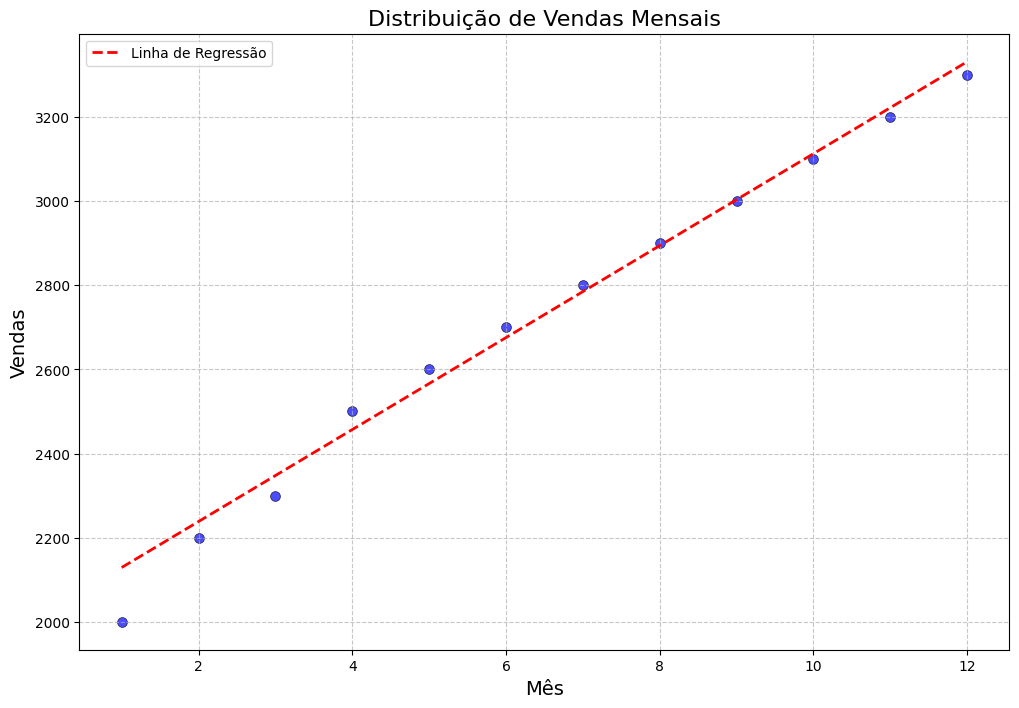

In [135]:
# Scatter plot para distribuição de vendas mensais
plt.figure(figsize=(12, 8))
sns.scatterplot(x='mes_numero', y='vendas', data=df_vendas, color='blue', s=50, alpha=0.7, edgecolor='black')

# Linha de regressão
plt.plot(df_vendas['mes_numero'], model.predict(df_vendas[['mes_numero']]), color='red', linestyle='--', linewidth=2, label='Linha de Regressão')

# Configurações de título e eixos
plt.title("Distribuição de Vendas Mensais", fontsize=16)
plt.xlabel("Mês", fontsize=14)
plt.ylabel("Vendas", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Exibir o gráfico
plt.show()

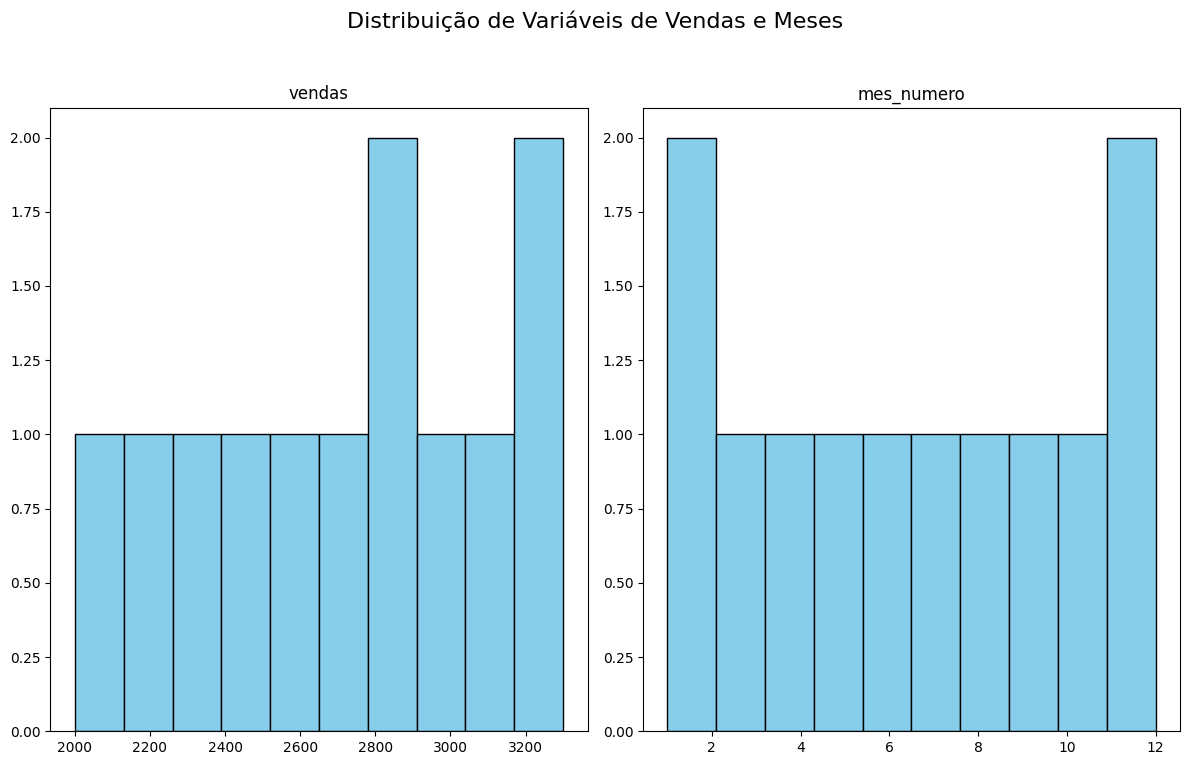

In [136]:
# Histograma de todas as variáveis em 'df_vendas'
df_vendas.hist(bins=10, figsize=(12, 8), grid=False, edgecolor='black', color='skyblue')

# Título principal para o conjunto de gráficos
plt.suptitle("Distribuição de Variáveis de Vendas e Meses", fontsize=16)

# Ajuste de layout para evitar sobreposição
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Exibe o gráfico
plt.show()